# DS-2B

In [38]:
import pandas as pd
import sklearn
import numpy as np
from matplotlib import pyplot as plt

## Import sets

In [39]:
train_data = pd.read_csv("./train_data_success.csv")
test_data = pd.read_csv('./test_data_success.csv')

In [40]:
train_data.head()
test_data.head()

,Unnamed: 0,age,interest,success
0,233,17.0,48.008462,1
1,25,34.0,65.962276,1
2,15,18.0,60.797971,1
3,227,23.0,40.614027,0
4,215,16.0,25.504759,0


In [41]:
success_features_train = train_data.iloc[:,[1,2]]
success_label_train = train_data["success"]

success_features_test = test_data.iloc[:,[1,2]]
success_label_test = test_data["success"]

## KNN classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [43]:
neigh = KNeighborsClassifier(metric="euclidean",)
neigh.fit(success_features_train, success_label_train)

KNeighborsClassifier(metric='euclidean')

In [44]:
prediction_test = neigh.predict(success_features_test)
prediction_test[:]

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1], dtype=int64)

In [45]:
cm = metrics.confusion_matrix(success_label_test, prediction_test)
print(cm)
# TODO: Use autotable.py from PetintLib

[[38  8]
 [ 2 42]]


In [46]:
print("Precision:,", metrics.precision_score(success_label_test, prediction_test))
print("Accuracy:,", metrics.accuracy_score(success_label_test, prediction_test))
print("Recall:,", metrics.recall_score(success_label_test, prediction_test))

Precision:, 0.84
Accuracy:, 0.8888888888888888
Recall:, 0.9545454545454546


(0.0, 1.0)

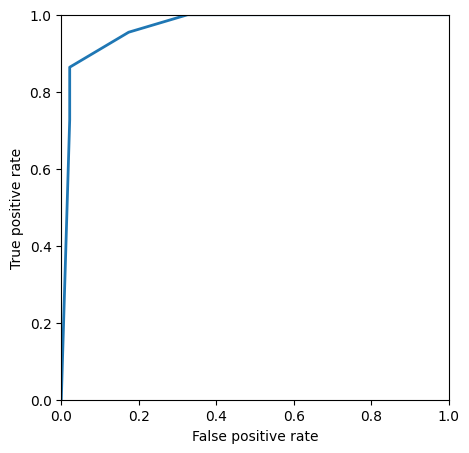

In [47]:
knn_prob = neigh.predict_proba(success_features_test)
fpr, tpr, theresholds = metrics.roc_curve(success_label_test, knn_prob[:,1], pos_label=1, sample_weight=None)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, linewidth=2.0)

y = x = np.linspace(1, 1, 100)
plt.plot(x, y, label='Random classifier')
plt.xlabel("False positive rate")
plt.ylabel('True positive rate')
plt.xlim([0, 1])
plt.ylim([0, 1])


In [48]:
metrics.roc_auc_score(success_label_test, knn_prob[:,1])

0.9688735177865613

## Tree CLF

In [49]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=20)
tree_clf = tree_clf.fit(success_features_train, success_label_train)

In [50]:
prediction_test_tree = tree_clf.predict(success_features_test)
cm = metrics.confusion_matrix(success_label_test, prediction_test_tree)
print(cm)
# TODO: Use autotable.py from PetintLib

[[42  4]
 [ 2 42]]


In [51]:
print("Precision:,", metrics.precision_score(success_label_test, prediction_test))
print("Accuracy:,", metrics.accuracy_score(success_label_test, prediction_test))
print("Recall:,", metrics.recall_score(success_label_test, prediction_test))

Precision:, 0.84
Accuracy:, 0.8888888888888888
Recall:, 0.9545454545454546


0.9337944664031621

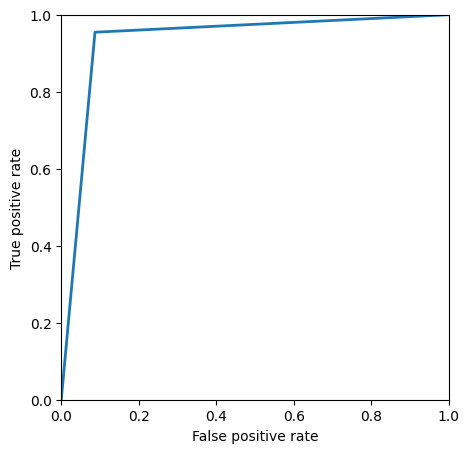

In [52]:
tree_prob = tree_clf.predict_proba(success_features_test)
fpr_tree, tpr_tree, thresholds_tree = metrics.roc_curve(success_label_test, tree_prob[:,1], pos_label=1, sample_weight=None)
plt.figure(figsize=(5, 5))
plt.plot(fpr_tree, tpr_tree, linewidth=2.0)

y = x = np.linspace(1, 1, 100)
plt.plot(x, y, label='Random classifier')
plt.xlabel("False positive rate")
plt.ylabel('True positive rate')
plt.xlim([0, 1])
plt.ylim([0, 1])

#AOC
metrics.roc_auc_score(success_label_test, tree_prob[:,1], average='macro', sample_weight=None)

[Text(0.6041666666666666, 0.95, 'X[1] <= 48.217\ngini = 0.478\nsamples = 207\nvalue = [82, 125]'),
 Text(0.425, 0.85, 'X[0] <= 34.5\ngini = 0.38\nsamples = 106\nvalue = [79, 27]'),
 Text(0.39166666666666666, 0.75, 'X[1] <= 37.059\ngini = 0.256\nsamples = 93\nvalue = [79, 14]'),
 Text(0.18333333333333332, 0.65, 'X[0] <= 7.5\ngini = 0.082\nsamples = 70\nvalue = [67, 3]'),
 Text(0.06666666666666667, 0.55, 'X[1] <= 24.828\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.03333333333333333, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1, 0.45, 'X[1] <= 26.136\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06666666666666667, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13333333333333333, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.55, 'X[0] <= 14.5\ngini = 0.059\nsamples = 66\nvalue = [64, 2]'),
 Text(0.23333333333333334, 0.45, 'X[0] <= 13.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.2, 0.35, 'gini = 0.0\nsamples = 9\nvalue = [

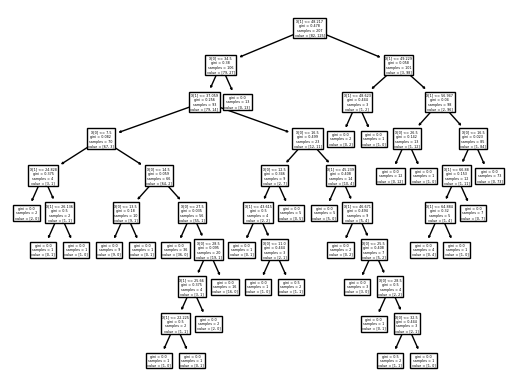

In [53]:
tree.plot_tree(tree_clf)

## SVM
[svm docs]('https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC')

ValueError: x and y must be the same size

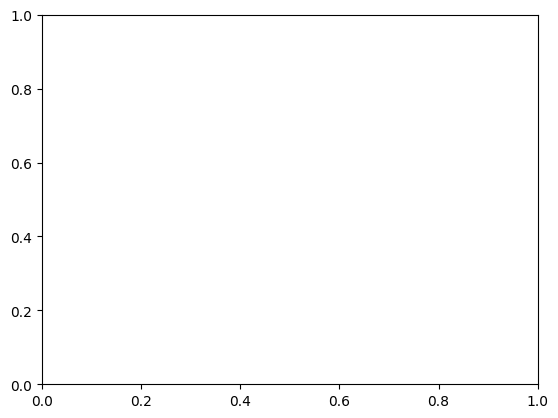

In [56]:
from sklearn import svm
plt.scatter(success_features_train.iloc[:, 0], success_features_test.iloc[:, 1],C=success_label_train, cmap='winter')